# Analyse des données

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
images = digits.images
target = digits.target
target_names = digits.target_names

In [3]:
import numpy as np
print(f'dimension D des données: {np.shape(images)[1] * np.shape(images)[2]}')

nb_exemples_classes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(digits.target)):
    nb_exemples_classes[digits.target[i]]+=1
print(f'Nombre d\'exemples par classes {nb_exemples_classes}')
print(f'nombre d\'exemple total: {np.shape(images)[0]}')

dimension D des données: 64
Nombre d'exemples par classes [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]
nombre d'exemple total: 1797


<Figure size 432x288 with 0 Axes>

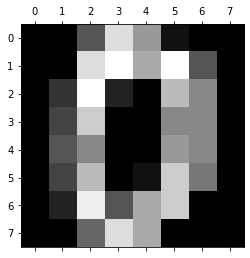

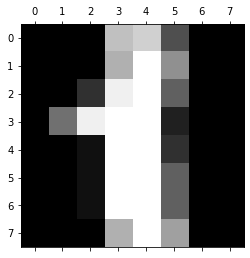

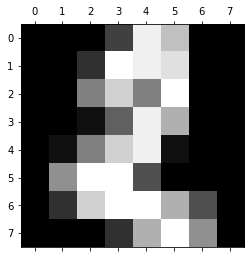

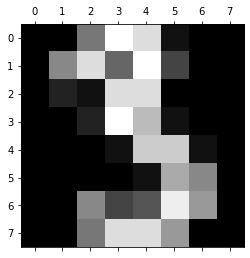

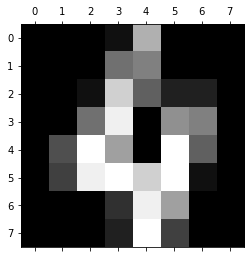

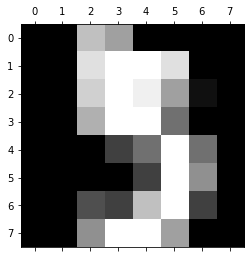

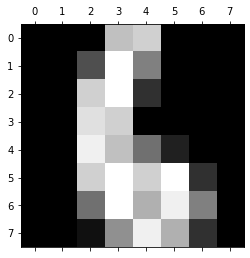

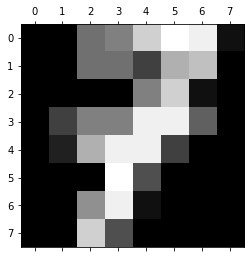

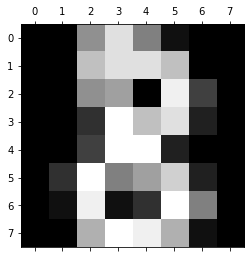

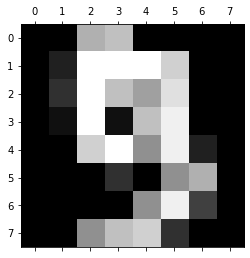

In [4]:
import matplotlib.pyplot as plt
plt.gray()
for i in range (10):
    plt.matshow(digits.images[i])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=42)

# Apprentissage

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
clf1 = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=1, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive',verbose=1))

Déterminons le nombre C Max de neurones cachés possible sachant qu'on a 1797 exemple et on sait qu'on doit avoir Nombre de paramètres libres ≤ Nb_app x N du coup :


Nombre de paramètres libres: (64+1)C + (C+1)*10 = 75C + 10 Nb_app = 1797 exemples N = 10 classes

apres application numerique on retrouve C=  239.46 ce qui veut dire que si l'on ne veut pas tomber sur l'overfitting on doit avoir Le nombre de neurones cachés inférieur à 240 au maximum on choisit donc notre plage en fonction:

In [ ]:
accuracies_test = []
accuracies_train = []
classifiers = []
C_val = [8, 10, 20, 30, 40, 50, 100] 

for C in C_val:
    clf1 = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, random_state=42))
    clf1.fit(X_train, y_train)
    accuracies_train.append(clf1.score(X_train, y_train))
    accuracies_test.append(clf1.score(X_test, y_test))
    classifiers.append(clf1)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [ ]:
index = accuracies_test.index(np.max(accuracies_test))
print(f'Best number of hidden neurons is {C_val[index]} for {np.round(accuracies_test[index], 2)} accuracy')

Best number of hidden neurons is 40 for 0.98 accuracy


# Cross-validation:

In [11]:
crossv_accuracies_test = []
crossv_accuracies_train = []
crossv_classifiers = []

for C in C_val:
    print(f'\n-----MLPClassifier for C={C}-----')
    clf2 = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, random_state=42, early_stopping=True, validation_fraction=0.2, verbose=1))
    clf2.fit(X_train, y_train)
    crossv_accuracies_train.append(clf2.score(X_train, y_train))
    crossv_accuracies_test.append(clf2.score(X_test, y_test))
    crossv_classifiers.append(clf2)


-----MLPClassifier for C=8-----
Iteration 1, loss = 1.31706155
Validation score: 0.853175
Iteration 2, loss = 0.59448659
Validation score: 0.892857
Iteration 3, loss = 0.36840926
Validation score: 0.908730
Iteration 4, loss = 0.26099806
Validation score: 0.900794
Iteration 5, loss = 0.20211672
Validation score: 0.912698
Iteration 6, loss = 0.16625953
Validation score: 0.900794
Iteration 7, loss = 0.14275882
Validation score: 0.912698
Iteration 8, loss = 0.12329809
Validation score: 0.920635
Iteration 9, loss = 0.11015822
Validation score: 0.924603
Iteration 10, loss = 0.09889585
Validation score: 0.924603
Iteration 11, loss = 0.09111561
Validation score: 0.920635
Iteration 12, loss = 0.08357379
Validation score: 0.924603
Iteration 13, loss = 0.07758030
Validation score: 0.924603
Iteration 14, loss = 0.07057669
Validation score: 0.928571
Iteration 15, loss = 0.06599773
Validation score: 0.924603
Iteration 16, loss = 0.06210666
Validation score: 0.924603
Iteration 17, loss = 0.05859792


In [17]:
crossv_index = crossv_accuracies_test.index(np.max(crossv_accuracies_test))
print(f'Le meilleurs nombre de neurons caché est {C_val[crossv_index]} pour {np.round(crossv_accuracies_test[crossv_index], 2)} accuracy')

Best number of hidden neurons is 50 for 0.97 accuracy


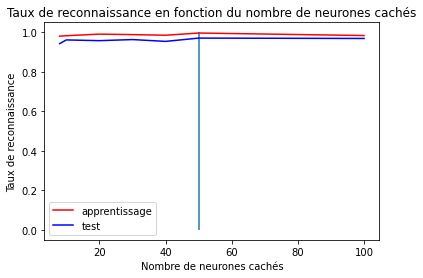

In [18]:
plt.plot(C_val, crossv_accuracies_train, color='r')
plt.plot(C_val, crossv_accuracies_test, color='b')
plt.vlines(C_val[crossv_index], 0, 1)
plt.title("Taux de reconnaissance en fonction du nombre de neurones cachés")
plt.xlabel('Nombre de neurones cachés')
plt.ylabel('Taux de reconnaissance')
plt.legend(['apprentissage', 'test'])
plt.show()

Par comparaison avec le résultat obtenu précédemment sans la base de cross-validation, nous obtenons un taux de reconnaissance de 97% pour 50 neurones cachés contre 98% pour 40 neurones.

En intégrant cette base de validation, nous faisons de la régularisation nous permettant de ne pas être en sur-apprentissage. et du coup on aura pas une grande variance.

In [19]:
from sklearn.metrics import confusion_matrix
Y_pred_test = crossv_classifiers[crossv_index].predict(X_test)
confusion_matrix(y_test, Y_pred_test)

array([[52,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 57]], dtype=int64)

La matrice de confusion présente 52 exemples bien classé mais aussi des exemple mal classé comme 3 exemples classé en tant que "Chiffre 3" au lieu d'être classé en tant que "Chiffre 8".

### Comparer les résultats obtenus avec ceux de l’algorithme des k-plus-proches-voisins en termes detaux de reconnaissance et de temps de classification. Régler k sur une base de validation.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
X, y = digits.data, digits.target
knn_scores = []
knn_classifiers = []

#kmax = nombre exemple / nombre classes
k_max = np.shape(images)[0]//len(target_names)

for i in range(1, k_max+1):
    KnnClf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', n_jobs=-1)

    #train model with cv of 10
    knn_scores.append(cross_val_score(KnnClf, X, y, cv=10, n_jobs=-1, scoring='accuracy').mean())
    knn_classifiers.append(KnnClf)

In [21]:
knn_index = knn_scores.index(np.max(knn_scores))
best_k = knn_scores[knn_index]
print(f'Best k is {knn_index} for {np.round(knn_scores[knn_index], 2)} accuracy')

Best k is 2 for 0.98 accuracy


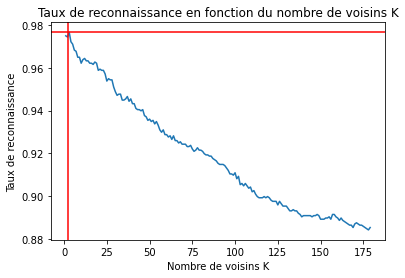

In [16]:
plt.title('Taux de reconnaissance en fonction du nombre de voisins K')
plt.xlabel('Nombre de voisins K')
plt.ylabel('Taux de reconnaissance')
plt.plot(range(1, k_max+1), knn_scores)
plt.axhline(knn_scores[knn_index], color='r')
plt.axvline(knn_index, color='r')
plt.show()

In [23]:
import timeit
starttime = timeit.default_timer()
crossv_classifiers[crossv_index].predict(X_test)
print("temps de classification du réseau de neurone", timeit.default_timer() - starttime)

temps de classification du réseau de neurone 0.005115799999657611


In [24]:
knn_classifiers[knn_index].fit(X_train, y_train)
starttime = timeit.default_timer()
knn_classifiers[knn_index].predict(X_test)
print("temps de classification de l'algorithme KNN", timeit.default_timer() - starttime)

temps de classification de l'algorithme KNN 0.08347980000053212


Le taux de reconnaissance est meilleur pour l'algorithme knn avec k = 2 en utilisant une base de cross-validation.



Le temps de classification en contre-partie pour l'algorithme KNN est plus lent que pour le réseau de neurone

# Rejet

In [25]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

In [26]:
proba_array = crossv_classifiers[crossv_index].predict_proba(X_test)
total_examples = y_test.shape[0]
taux_rejet_distance = []
taux_reconnaissance_distance = []
rapport_distance = []

for i in range(0, 100): 
    nb_classified_examples = argmax_reject_threshold(proba_array, i/100)
    nb_rejet_distance = np.sum(nb_classified_examples == -1)
    nb_accept_distance = np.sum(nb_classified_examples == y_test)
    taux_rejet_distance.append(nb_rejet_distance / total_examples)
    taux_reconnaissance_distance.append(nb_accept_distance / (total_examples - nb_rejet_distance))
    rapport_distance.append(nb_accept_distance / nb_rejet_distance)

C:\Users\moham\AppData\Local\Temp/ipykernel_33576/3577690586.py:13: RuntimeWarning: divide by zero encountered in long_scalars
  rapport_distance.append(nb_accept_distance / nb_rejet_distance)


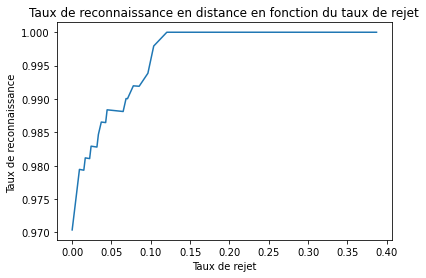

In [27]:
plt.title('Taux de reconnaissance en distance en fonction du taux de rejet')
plt.xlabel('Taux de rejet')
plt.ylabel('Taux de reconnaissance ')
plt.plot(taux_rejet_distance, taux_reconnaissance_distance)
plt.axvline(np.max(rapport_distance))
plt.show()

In [28]:
proba_array = crossv_classifiers[crossv_index].predict_proba(X_test)
total_examples = y_test.shape[0]
taux_rejet_ambiguite = []
taux_reconnaissance_ambiguite = []
rapport_ambiguite = []

for i in range(0, 100): 
    nb_classified_examples = argmax_top2_reject_threshold(proba_array, i/100)
    nb_rejet_ambiguite = np.sum(nb_classified_examples == -1)
    nb_accept_ambiguite = np.sum(nb_classified_examples == y_test)
    taux_rejet_ambiguite.append(nb_rejet_ambiguite / total_examples)
    taux_reconnaissance_ambiguite.append(nb_accept_ambiguite / (total_examples - nb_rejet_ambiguite))
    rapport_ambiguite.append(nb_accept_ambiguite / nb_rejet_ambiguite)

C:\Users\moham\AppData\Local\Temp/ipykernel_33576/1304158506.py:13: RuntimeWarning: divide by zero encountered in long_scalars
  rapport_ambiguite.append(nb_accept_ambiguite / nb_rejet_ambiguite)


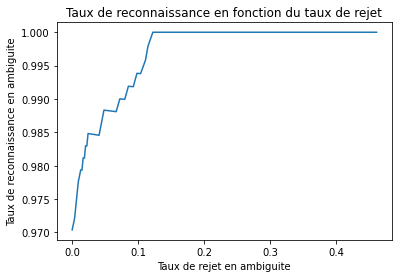

In [29]:
plt.title('Taux de reconnaissance en fonction du taux de rejet')
plt.xlabel('Taux de rejet en ambiguite')
plt.ylabel('Taux de reconnaissance en ambiguite')
plt.plot(taux_rejet_ambiguite, taux_reconnaissance_ambiguite)
plt.show()

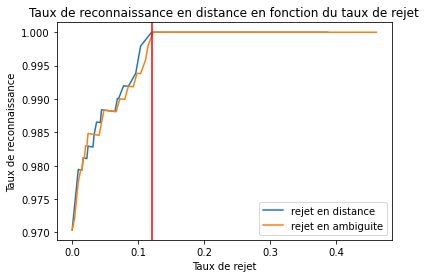

In [30]:
plt.title('Taux de reconnaissance en distance en fonction du taux de rejet')
plt.xlabel('Taux de rejet')
plt.ylabel('Taux de reconnaissance')
plt.plot(taux_rejet_distance, taux_reconnaissance_distance)
plt.plot(taux_rejet_ambiguite, taux_reconnaissance_ambiguite)
plt.legend(['rejet en distance','rejet en ambiguite'])
plt.axvline(0.121, color='r')
plt.show()

### Cascade de classifieurs

In [39]:
print('taux de rejet choisi:', taux_rejet_distance.index(0.12037037037037036))

taux de rejet choisi: 90


In [31]:
nb_classified_examples = argmax_top2_reject_threshold(proba_array, 90/100) 
nb_rejet_ambiguite = (nb_classified_examples == -1) 
nb_accept_ambiguite = (nb_classified_examples == y_test) 

# images rejetées
img_denied_X = X_test[nb_rejet_ambiguite]
img_denied_y = y_test[nb_rejet_ambiguite]

#images acceptées
img_accepted_X = X_test[nb_accept_ambiguite]
img_accepted_y = y_test[nb_accept_ambiguite]

In [32]:
print('Taux de reconnaissance par le KNN sur les images rejetées' , np.round(knn_classifiers[knn_index].score(img_denied_X, img_denied_y), 2))

Taux de reconnaissance par le KNN sur les images rejetées 0.94


In [33]:
print('Taux de reconnaissance par le réseau de neurones sur les images acceptées' , np.round(crossv_classifiers[crossv_index].score(img_accepted_X, img_accepted_y), 2))
print('Taux de reconnaissance par le réseau de neurones sur les images rejetées', np.round(crossv_classifiers[crossv_index].score(img_denied_X, img_denied_y), 2))


Taux de reconnaissance par le réseau de neurones sur les images acceptées 1.0
Taux de reconnaissance par le réseau de neurones sur les images rejetées 0.83


In [42]:
Y_pred_knn = knn_classifiers[knn_index].predict(img_denied_X) 
confusion_matrix(img_denied_y, Y_pred_knn)

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 12]], dtype=int64)

Selon les seuils de rejets, nous avons utilisé le réseau de neurones pour les images acceptées et l'algorithme KNN pour les images rejetées.

Nous observons un taux de reconnaissance à 100% pour le réseau de neurones et 94% pour l'algorithme KNN.

On observe parmis les exemples mal classé le chiffre 9 a été mal classé et a été classifié en tant que le chiffre 3, chiffre 4, chiffre 5 et chiffre 8.

In [32]:
Y_pred_cv = crossv_classifiers[crossv_index].predict(img_accepted_X) 
confusion_matrix(img_accepted_y, Y_pred_cv)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]], dtype=int64)